### Code that Andrea Prepped for Me

In [2]:
import datetime as dt
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import xarray as xr
import math
import netCDF4
import pandas as pd 

%matplotlib inline

In [3]:
#the model reforecast date
year = 2021    
month = 1
day = 1

#below, number of forcast days in S2S data, for this info see: https://confluence.ecmwf.int/display/S2S/Models
total_days = 46           # how many days are we plotting? 
first_fhr = 0            # setting to 0 = 00 UTC, 6 = 06 UTC, ...
hours = total_days * 24  # total hours in time range to plot
hr_inc = 24               # the timestep for the data
startyear = year-20       #the ECMWF data has a range of 20 years from the reforecast year.


In [4]:
t_ensmn_ds = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/ensmn_t/ECMWF_ensmn_t.nc")
t_ensvar = t_ensmn_ds["t"]
t_ens_data = t_ensvar.mean(dim='longitude').mean(dim='latitude')
ens_date = t_ensmn_ds["date"]

t_ensmn_jma = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/ensmn_t/JMA_ensmn_t.nc")
t_ensjma = t_ensmn_jma["t"]
t_ens_jma = t_ensjma.mean(dim='longitude').mean(dim='latitude')
ens_date_jma = t_ensmn_jma["date"]

t_ensmn_uk = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/ensmn_t/UKMO_ensmn_t.nc")
t_ensuk = t_ensmn_uk["t"]
t_ens_uk = t_ensuk.mean(dim='longitude').mean(dim='latitude')
ens_date_uk = t_ensmn_uk["date"]

t_ensmn_eccc = xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/ensmn_t/ECCC_ensmn_t.nc")
t_enseccc = t_ensmn_eccc["t"]
t_ens_eccc = t_enseccc.mean(dim='longitude').mean(dim='latitude')
ens_date_eccc = t_ensmn_eccc["date"]

j_ds =  xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/rd_t/realt_jan.nc")
f_ds =  xr.open_dataset("/home11/grad/2021/gd673524/research/gdines/box_proj/CONCAN_data/rd_t/realt_feb.nc")
rt_ds = xr.concat([j_ds,f_ds], dim='time')
t_var = rt_ds["t"]
t_data = t_var.mean(dim='lon').mean(dim='lat')


In [5]:
t_data

<xarray.DataArray 't' (date: 8, step: 47)>
array([[271.7987 , 271.91763, 271.71848, 272.2194 , 272.8128 , 273.04755,
        272.87567, 272.96353, 273.17258, 273.2534 , 273.23776, 273.20462,
        272.75797, 272.22797, 271.76718, 271.24414, 270.75455, 270.08923,
        269.41605, 268.86447, 268.4625 , 268.21368, 268.0517 , 268.02716,
        268.0663 , 268.11078, 268.1425 , 268.23608, 268.39163, 268.52008,
        268.75647, 268.79483, 268.8194 , 268.85928, 268.82043, 268.8819 ,
        268.95816, 269.02716, 268.9057 , 269.01752, 269.14474, 269.2063 ,
        269.08725, 268.948  , 268.9935 , 269.0731 , 269.23395],
       [272.72714, 273.29858, 273.43317, 272.9288 , 273.00272, 273.68008,
        274.05005, 273.9802 , 273.67093, 273.29376, 272.49564, 271.6282 ,
        271.0765 , 270.62433, 270.19714, 269.6861 , 269.0512 , 268.73087,
        268.45306, 268.39868, 268.41104, 268.4016 , 268.39154, 268.39722,
        268.45074, 268.5507 , 268.58527, 268.63058, 268.6067 , 268.5755 ,
        268.57034, 268.69995, 268.90866, 269.106  , 269.2097 , 269.30756,
        269.34253, 269.3458 , 269.3987 , 269.4895 , 269.5487 , 269.59045,
        269.77118, 269.75903, 269.66086, 269.69672, 269.7451 ],
       [273.47803, 273.95218, 274.14505, 273.83386, 273.04175, 272.53427,
        272.4698 , 272.0993 , 271.90002, 271.94067, 271.58755, 270.92508,
        270.10562, 269.30038, 268.72507, 268.16885, 267.72095, 267.59064,
        267.7127 , 267.81662, 267.96655, 268.03412, 268.00104, 268.1352 ,
...
        269.84076, 270.02148, 270.16962, 270.332  , 270.28314, 270.2497 ,
        270.32883, 270.44702, 270.37613, 270.46204, 270.61255, 270.7362 ,
        270.78732, 270.8714 , 270.9128 , 270.9838 , 271.0852 ],
       [270.45468, 270.37003, 269.80502, 269.02875, 268.7167 , 269.01465,
        269.10016, 269.2109 , 269.43787, 269.32056, 269.2426 , 269.29956,
        269.23712, 269.01245, 268.72183, 268.54816, 268.6317 , 268.52426,
        268.60156, 268.65793, 268.8374 , 269.04907, 269.17746, 269.2043 ,
        269.10995, 269.18753, 269.42935, 269.6217 , 269.75397, 269.7279 ,
        269.73312, 269.84332, 269.98334, 270.1155 , 270.29333, 270.33005,
        270.40317, 270.61365, 270.89935, 271.1535 , 271.33755, 271.60004,
        271.84192, 271.91183, 272.05905, 272.2809 , 272.4254 ],
       [269.17053, 269.03683, 269.3829 , 269.45016, 269.20715, 269.09357,
        268.92087, 268.86252, 269.07895, 269.12775, 268.66803, 268.1055 ,
        267.73923, 267.6158 , 267.8269 , 268.06064, 268.25964, 268.47653,
        268.7928 , 268.95892, 269.19843, 269.31726, 269.3884 , 269.46936,
        269.526  , 269.6833 , 269.7259 , 269.78336, 269.92508, 270.06467,
        270.38208, 270.55487, 270.6419 , 270.74524, 271.00833, 271.20248,
        271.31915, 271.4862 , 271.44687, 271.33826, 271.41406, 271.6091 ,
        271.84427, 272.03085, 272.2516 , 272.55228, 272.8071 ]],
      dtype=float32)
Coordinates:
    level    int32 ...
  * step     (step) timedelta64[ns] 0 days 1 days 2 days ... 45 days 46 days
  * date     (date) datetime64[ns] 2021-01-04 2021-01-07 ... 2021-01-28

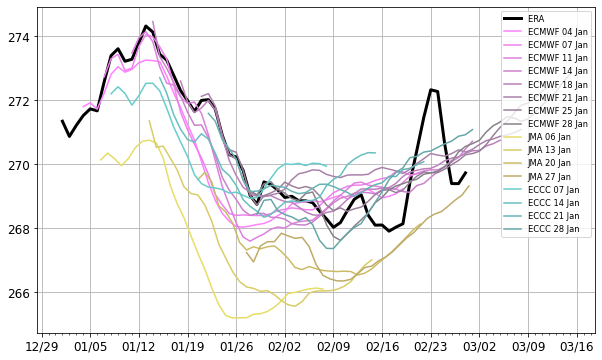

In [ ]:
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(10, 6))
    date1jan = dt.datetime(2021,1,1,0)
    dateclimo1 = dt.datetime(2021,1,1,0)
    dateclimo2 = dt.datetime(2021,3,1,0)
    climohrs = (dateclimo2-dateclimo1) / dt.timedelta(hours=1)

    #create an array of times we want to plot...
    #times = [date1 + dt.timedelta(hours=x) for x in range(0,hours,hr_inc)]
    climotimes = [dateclimo1 + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    combotimes = [date1jan + dt.timedelta(hours=c) for c in range(0,int(climohrs),hr_inc)]
    # in old code, dateclimo1 and date1jan were not equal, this is a hold over from that code
    
    tdata_JF = t_data.loc[dict(time=climotimes)]
    ax.plot(combotimes, t_data.values, color="Black", label='ERA ', linewidth=3)

    
    for ddate in range(0,len(ens_date),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1 = ens_date[ddate]    # first date to plot
        t_data_date = t_ens_data.loc[dict(date=date1)]
        ## in the line below date is the inialization date and each time step is added to it to create an array of times
        t_dates = date1 + t_data_date.step  
        #print(t_data_date)
        # Specify how our lines should look
        colorR = (ddate) / 10. #used just to get some differnt colors on the plot
        date1_time = pd.to_datetime(str(date1.values)) #converts the date into a type datetime
        ax.plot(t_dates, t_data_date.values, color=(1-colorR/1.5,.5,1-colorR/1.5,), label='ECMWF '+date1_time.strftime('%d %b') ) 

    for ddate in range(0,len(ens_date_jma),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1jma = ens_date_jma[ddate]    # first date to plot
        t_dates_jma = date1jma + t_ens_jma.step
        t_jma_date = t_ens_jma.loc[dict(date=date1jma)]
        #print(t_jma_date)
        # Specify how our lines should look
        colorR = (ddate+2.) / 10.
        date1_timejma = pd.to_datetime(str(date1jma.values))
        ax.plot(t_dates_jma, t_jma_date.values, color=(1-colorR/2,1-colorR/1.5,0.4,), label='JMA '+date1_timejma.strftime('%d %b') ) 
  
    #for ddate in range(0,len(ens_date_uk),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        #date1uk = ens_date_uk[ddate]    # first date to plot
        #t_dates_uk = date1uk + t_ens_uk.step
        #t_uk_date = t_ens_uk.loc[dict(date=date1uk)]
        #print(t_uk_date)
        # Specify how our lines should look
        #colorR = (ddate+2.) / 35.
        #date1_timeuk = pd.to_datetime(str(date1uk.values))
        #ax.plot(t_dates_uk, t_uk_date.values, color=(colorR,colorR,colorR,), label='UKMET '+date1_timeuk.strftime('%d %b') ) 

    for ddate in range(0,len(ens_date_eccc),1):
        #date1 = dt.datetime(year=startyear+y,month,day,0) for y in range(startyear,year,1)  # first date to plot
        date1eccc = ens_date_eccc[ddate]    # first date to plot
        t_dates_eccc = date1eccc + t_ens_eccc.step
        t_eccc_date = t_ens_eccc.loc[dict(date=date1eccc)]
        #print(t_eccc_date)
        # Specify how our lines should look
        colorR = (ddate+4.) / 10.
        date1_timeeccc = pd.to_datetime(str(date1eccc.values))
        ax.plot(t_dates_eccc, t_eccc_date.values, color=(.4,1-colorR/2,1-colorR/2,), label='ECCC '+date1_timeeccc.strftime('%d %b') ) 
  
        
    # Add some plot lables and legends
    #ax.set_xlabel('Time')
    #ax.set_ylabel('Area Averaged Temperature (K)')
    #ax.set_title(' Area Avg Tempearture ECMWF S2S Reforecast')
    ax.grid(True)
    ax.legend(loc='upper right',fontsize='x-small');

    # Helpers to format and locate ticks for dates
    from matplotlib.dates import DateFormatter, DayLocator, WeekdayLocator
    from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

    # Set the x-axis to do major ticks every 1 week and label them like '11/02'
    ax.xaxis.set_major_locator(WeekdayLocator(TU))
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_minor_locator(DayLocator())

